In [10]:
import bz2
import matplotlib.pyplot as plt
import numpy as np
import os
import pandas as pd
import pickle
from pylab import *

%matplotlib inline
plt.rcParams['figure.figsize'] = 10, 8

In [2]:
DATA_DIR = '../../data/cluster/year/'

In [11]:
os.listdir(DATA_DIR)

['tensor2000.pkl.bz2',
 'tensor2001.pkl.bz2',
 'tensor2002.pkl.bz2',
 'tensor2003.pkl.bz2',
 'tensor2004.pkl.bz2',
 'tensor2005.pkl.bz2',
 'tensor2006.pkl.bz2',
 'tensor2007.pkl.bz2',
 'tensor2008.pkl.bz2',
 'tensor2009.pkl.bz2',
 'tensor2010.pkl.bz2',
 'tensor2011.pkl.bz2',
 'tensor2012.pkl.bz2',
 'tensor2013.pkl.bz2',
 'tensor2014.pkl.bz2',
 'weights.bestNN.hdf5',
 'X_big_test.csv',
 'X_big_train.csv',
 'X_big_valid.csv',
 'X_test.csv',
 'X_train.csv',
 'X_valid.csv',
 'y_big_test.csv',
 'y_big_train.csv',
 'y_big_valid.csv',
 'y_matrix2000.pkl.bz2',
 'y_matrix2001.pkl.bz2',
 'y_matrix2002.pkl.bz2',
 'y_matrix2003.pkl.bz2',
 'y_matrix2004.pkl.bz2',
 'y_matrix2005.pkl.bz2',
 'y_matrix2006.pkl.bz2',
 'y_matrix2007.pkl.bz2',
 'y_matrix2008.pkl.bz2',
 'y_matrix2009.pkl.bz2',
 'y_matrix2010.pkl.bz2',
 'y_matrix2011.pkl.bz2',
 'y_matrix2012.pkl.bz2',
 'y_matrix2013.pkl.bz2',
 'y_matrix2014.pkl.bz2',
 'y_test.csv',
 'y_train.csv',
 'y_valid.csv']

In [3]:
def load_x_and_following_y(data_path, year, verbose=False):
    x_path = data_path + 'tensor%d.pkl.bz2' % year
    y_path = data_path + 'y_matrix%d.pkl.bz2' % (year + 1)
    if verbose: print('\nLoading X tensor from %s' % x_path)
    X = pickle.load(bz2.open(x_path, 'rb'))
    if verbose: print('Loading y tensor from %s' % y_path)
    Y = pickle.load(bz2.open(y_path, 'rb'))
    
    if verbose:
        print('  X: ', X.shape, '(width, height, layers)')
        print('  Y: ', Y.shape, '    (width, height)')
    return X, Y

In [4]:
X, next_Y = load_x_and_following_y(DATA_DIR, 2000, verbose=True)


Loading X tensor from ../../data/cluster/year/tensor2000.pkl.bz2
Loading y tensor from ../../data/cluster/year/y_matrix2001.pkl.bz2
  X:  (188, 353, 19) (width, height, layers)
  Y:  (188, 353)     (width, height)


In [5]:
def add_next_year_beetle_data(X, next_Y):
    width, height, layers = X.shape
    X = np.concatenate([X, next_Y.reshape([width, height, 1])], axis=2)
    return X

In [6]:
X_new = add_next_year_beetle_data(X, next_Y)

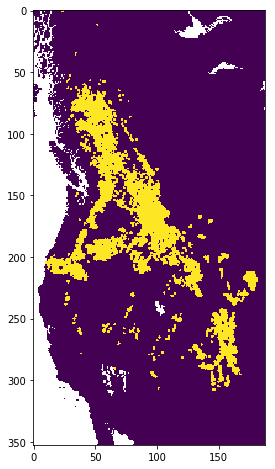

In [7]:
imshow(np.rot90(X_new[:, :, 19]));

In [9]:
def make_and_save_tensor(data_path, year, verbose=True):
    print('\nMaiking new tensor for %d' % year)
    out_path = data_path + 'tensor20_%d.pkl.bz2' % year
    X, next_Y = load_x_and_following_y(data_path, year, verbose=verbose)
    new_X = add_next_year_beetle_data(X, next_Y)
    print('Saving tensor to %s...' % out_path)
    pickle.dump(new_X, bz2.open(out_path, 'wb'))

In [13]:
for year in range(2000, 2014):
    make_and_save_tensor(DATA_DIR, year)


Maiking new tensor for 2000

Loading X tensor from ../../data/cluster/year/tensor2000.pkl.bz2
Loading y tensor from ../../data/cluster/year/y_matrix2001.pkl.bz2
  X:  (188, 353, 19) (width, height, layers)
  Y:  (188, 353)     (width, height)
Saving tensor to ../../data/cluster/year/tensor20_2000.pkl.bz2...

Maiking new tensor for 2001

Loading X tensor from ../../data/cluster/year/tensor2001.pkl.bz2
Loading y tensor from ../../data/cluster/year/y_matrix2002.pkl.bz2
  X:  (188, 353, 19) (width, height, layers)
  Y:  (188, 353)     (width, height)
Saving tensor to ../../data/cluster/year/tensor20_2001.pkl.bz2...

Maiking new tensor for 2002

Loading X tensor from ../../data/cluster/year/tensor2002.pkl.bz2
Loading y tensor from ../../data/cluster/year/y_matrix2003.pkl.bz2
  X:  (188, 353, 19) (width, height, layers)
  Y:  (188, 353)     (width, height)
Saving tensor to ../../data/cluster/year/tensor20_2002.pkl.bz2...

Maiking new tensor for 2003

Loading X tensor from ../../data/cluster